# Preprocess dataset 


Preprocess MIMIC-III dataset.
The goal is to combine each admission with admission ID, diagnosis ICD codes and duration in hospital, and age 

In [15]:
import getpass
user_id = getpass.getuser()

import matplotlib.pyplot as plt
import numpy as np
import os 
import pandas as pd

In [2]:
base_path = f"/home/{user_id}/OTTEHR/mimic_iii_exp/mimic_iii"

In [3]:
admission_df = pd.read_csv(os.path.join(base_path, "ADMISSIONS.csv"))
display(admission_df)

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,58594,98800,191113,2131-03-30 21:13:00,2131-04-02 15:02:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Private,ENGL,NOT SPECIFIED,SINGLE,WHITE,2131-03-30 19:44:00,2131-03-30 22:41:00,TRAUMA,0,1
58972,58595,98802,101071,2151-03-05 20:00:00,2151-03-06 09:10:00,2151-03-06 09:10:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Medicare,ENGL,CATHOLIC,WIDOWED,WHITE,2151-03-05 17:23:00,2151-03-05 21:06:00,SAH,1,1
58973,58596,98805,122631,2200-09-12 07:15:00,2200-09-20 12:08:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Private,ENGL,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,RENAL CANCER/SDA,0,1
58974,58597,98813,170407,2128-11-11 02:29:00,2128-12-22 13:11:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,ENGL,CATHOLIC,MARRIED,WHITE,2128-11-10 23:48:00,2128-11-11 03:16:00,S/P FALL,0,0


In [4]:
patient_df = pd.read_csv(os.path.join(base_path, "PATIENTS.csv"))
display(patient_df)

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0
1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,NaN,1
2,236,251,M,2090-03-15 00:00:00,NaN,NaN,NaN,0
3,237,252,M,2078-03-06 00:00:00,NaN,NaN,NaN,0
4,238,253,F,2089-11-26 00:00:00,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...
46515,31840,44089,M,2026-05-25 00:00:00,NaN,NaN,NaN,0
46516,31841,44115,F,2124-07-27 00:00:00,NaN,NaN,NaN,0
46517,31842,44123,F,2049-11-26 00:00:00,2135-01-12 00:00:00,2135-01-12 00:00:00,NaN,1
46518,31843,44126,F,2076-07-25 00:00:00,NaN,NaN,NaN,0


In [5]:
diagnoses_icd_df = pd.read_csv(os.path.join(base_path, "DIAGNOSES_ICD.csv"))
display(diagnoses_icd_df)

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,1297,109,172335,1.0,40301
1,1298,109,172335,2.0,486
2,1299,109,172335,3.0,58281
3,1300,109,172335,4.0,5855
4,1301,109,172335,5.0,4254
...,...,...,...,...,...
651042,639798,97503,188195,2.0,20280
651043,639799,97503,188195,3.0,V5869
651044,639800,97503,188195,4.0,V1279
651045,639801,97503,188195,5.0,5275


In [6]:
# Aggregate diagnoses_icd_df with same hadm_id merged to one row
grouped_diagnoses_icd_df = diagnoses_icd_df.groupby("HADM_ID")["ICD9_CODE"].agg(list).reset_index()
grouped_diagnoses_icd_df = grouped_diagnoses_icd_df.rename(columns={'icd_code': "diagnosis_icd_code"})
display(grouped_diagnoses_icd_df)

,HADM_ID,ICD9_CODE
0,100001,"[25013, 3371, 5849, 5780, V5867, 25063, 5363, ..."
1,100003,"[53100, 2851, 07054, 5715, 45621, 53789, 4019,..."
2,100006,"[49320, 51881, 486, 20300, 2761, 7850, 3090, V..."
3,100007,"[56081, 5570, 9973, 486, 4019]"
4,100009,"[41401, 99604, 4142, 25000, 27800, V8535, 4148..."
...,...,...
58971,199993,"[41031, 42821, 42731, 4271, 5180, 4240, 2760, ..."
58972,199994,"[486, 4280, 51881, 3970, 496, 4169, 585, 42732..."
58973,199995,"[4210, 7464, 42971, 30401, 4412, 44284, V1259,..."
58974,199998,"[41401, 9971, 9975, 42731, 78820, 4111, V4582,..."


In [7]:
# Combine admission, diagnoses_icd and procedures_icd
mimic_iii_df = admission_df.merge(patient_df, left_on='SUBJECT_ID', right_on='SUBJECT_ID')
mimic_iii_df = mimic_iii_df.merge(grouped_diagnoses_icd_df, left_on='HADM_ID', right_on='HADM_ID')
mimic_iii_df.columns


Index(['ROW_ID_x', 'SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'DISCHTIME',
       'DEATHTIME', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME', 'DIAGNOSIS',
       'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA', 'ROW_ID_y', 'GENDER',
       'DOB', 'DOD', 'DOD_HOSP', 'DOD_SSN', 'EXPIRE_FLAG', 'ICD9_CODE'],
      dtype='object')

In [8]:
def time_difference_in_seconds(time1, time2):
    """ 
      Function to convert a date-time string into total seconds
      :param str time1: start time
      :param str time2: end time 
    """
    def datetime_to_seconds(dt_str):
        # Split date and time
        date_part, time_part = dt_str.split()
        year, month, day = map(int, date_part.split('-'))
        hour, minute, second = map(int, time_part.split(':'))
        
        # Calculate the total seconds
        # Days in each month assuming no leap years for simplicity
        days_in_month = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
        # Adjust for leap years
        if year % 4 == 0 and (year % 100 != 0 or year % 400 == 0):
            days_in_month[1] = 29
        
        # Calculate total days in the year
        days_in_year = sum(days_in_month)
        # Convert year to total days
        total_days = (year - 1) * days_in_year + sum(days_in_month[:month - 1]) + day - 1
        
        # Convert everything to seconds
        total_seconds = total_days * 86400 + hour * 3600 + minute * 60 + second
        return total_seconds
    
    # Calculate seconds for both times
    seconds1 = datetime_to_seconds(time1)
    seconds2 = datetime_to_seconds(time2)
    
    # Return the difference in years 
    seconds_in_year = 365.25 * 24 * 60 * 60
    return (seconds2 - seconds1)/seconds_in_year

In [9]:
# Calculate the duaration column
mimic_iii_df['duration'] = (pd.to_datetime(mimic_iii_df["DISCHTIME"])-pd.to_datetime(mimic_iii_df["ADMITTIME"])).dt.total_seconds()
mimic_iii_df['age'] = mimic_iii_df.apply(lambda row: time_difference_in_seconds(row["DOB"], row["ADMITTIME"]), axis=1)

mimic_iii_df

,ROW_ID_x,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,ROW_ID_y,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,ICD9_CODE,duration,age
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,...,19,F,2131-05-07 00:00:00,NaN,NaN,NaN,0,"[9678, 9693, E9502, E9503, 3488, 29620, 4019]",98880.0,70.892589
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,...,20,M,2082-07-17 00:00:00,NaN,NaN,NaN,0,"[41401, 4111, 4241, V4582, 2724, 4019, 60000, ...",474900.0,71.083647
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,...,20,M,2082-07-17 00:00:00,NaN,NaN,NaN,0,"[2252, 3485, 78039, 4241, 4019, 2720, 2724, V4...",584760.0,75.205518
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,...,21,M,2100-05-31 00:00:00,NaN,NaN,NaN,0,"[41041, 41401, 53081, 25000]",246840.0,38.991585
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,...,22,M,2101-11-21 00:00:00,NaN,NaN,NaN,0,"[41071, 25011, 41401, 4019]",305340.0,64.821595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,58594,98800,191113,2131-03-30 21:13:00,2131-04-02 15:02:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Private,...,46213,F,2111-11-05 00:00:00,NaN,NaN,NaN,0,"[8028, 2851, 8701, 87341, 87352, 87343, 6202, ...",236940.0,19.386404
58972,58595,98802,101071,2151-03-05 20:00:00,2151-03-06 09:10:00,2151-03-06 09:10:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Medicare,...,46214,F,2067-09-21 00:00:00,2151-03-06 00:00:00,2151-03-06 00:00:00,NaN,1,"[430, 4019, 41401, V667]",47400.0,83.397217
58973,58596,98805,122631,2200-09-12 07:15:00,2200-09-20 12:08:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Private,...,46215,M,2158-03-02 00:00:00,NaN,NaN,NaN,0,"[56211, 51881, 1890, 5849, 5184, 5180, 2762, 9...",708780.0,42.503223
58974,58597,98813,170407,2128-11-11 02:29:00,2128-12-22 13:11:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,...,46216,F,2068-02-04 00:00:00,NaN,NaN,NaN,0,"[85201, 5990, E8809, 85221, 8024, 8028, 8020, ...",3580920.0,60.892823


In [10]:
# Drop some columns, rename some columns and add version column
target_columns = ['HADM_ID', 'ICD9_CODE', 'duration', 'age']
mimic_iii_df = mimic_iii_df[target_columns]
mimic_iii_df.rename(columns={
    'HADM_ID': 'admid',
    'ICD9_CODE': 'ICD codes'
}, inplace=True)


/tmp/ipykernel_1897978/874967806.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mimic_iii_df.rename(columns={


In [11]:
# Filter out rows with empty ICD codes 
mimic_iii_df = mimic_iii_df[mimic_iii_df.apply(lambda row: str(row['ICD codes']) != '[nan]', axis=1)]

In [12]:
# Save the final admission dataframe into csv
mimic_output_path = f"/home/{user_id}/OTTEHR/outputs/"
mimic_iii_df.to_csv(os.path.join(mimic_output_path, 'mimic_iii', 'admission_patient_diagnosis_ICD_with_age.csv'), index=False, header=True)

(array([8.101e+03, 4.000e+00, 8.900e+01, 4.460e+02, 9.270e+02, 1.049e+03,
        1.172e+03, 1.617e+03, 2.411e+03, 3.130e+03, 3.788e+03, 4.986e+03,
        5.480e+03, 5.052e+03, 4.904e+03]),
 array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60.,
        65., 70., 75.]),
 <BarContainer object of 15 artists>)

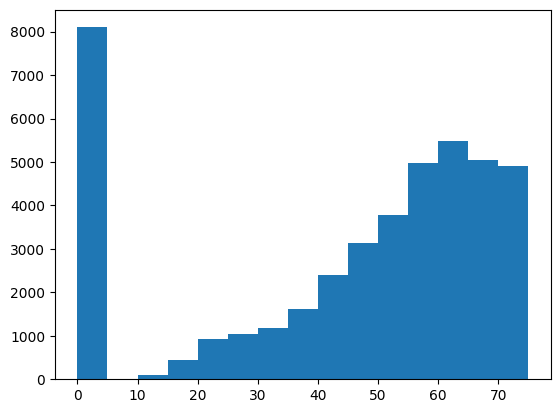

In [17]:
# Plot age distribution
bins = np.arange(0, 80, 5)
plt.hist(mimic_iii_df['age'], bins=bins)